## Notebook to plot FDSM grades.

If you would like to try running this, you may need to change credentials in line3 to redirect to the proper path. 

Ty to google cloud documentation\
Ty to chatgpt

[Form Link](https://forms.gle/D2jpUom9w12EHa6B8)

[Google Sheet Link](https://docs.google.com/spreadsheets/d/1--8RKMQwkET7apyJMdw_WTGHJh74l8ZHbWGqkhMb0EU/edit#gid=1677457)

Imports

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from sklearn.preprocessing import MinMaxScaler

Connect to google sheet

In [31]:
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
credentials = ServiceAccountCredentials.from_json_keyfile_name('/Users/raaghavt/Desktop/UCSB/Fall2023/FDSM/FinalGrade/creds.json', scope)
gc = gspread.authorize(credentials)
sheet = gc.open('103 grade').sheet1

Data acquisition from sheet

In [32]:
column_a = sheet.col_values(2,)
column_b = sheet.col_values(3)

column_a = column_a[1:]
column_b = column_b[1:]

data = np.vstack((column_a,column_b))

Sort data to have letters in correct order

In [33]:
# Define the order of categories
categories = ["A+", "A", "A-", "B+", "B", "B-", "C+", "C", "C-", "D+", "D", "D-", "F"]

# Create a mapping of categories to indices
category_indices = {category: index for index, category in enumerate(categories)}

# Sort the first row indices
sorted_indices = np.argsort([category_indices[category] for category in data[0]])

# Apply sorting to both rows
sorted_matrix = data[:, sorted_indices]

print(sorted_matrix)
reversed_matrix = sorted_matrix[:, ::-1]

[['A+' 'A+' 'A+' 'A+' 'A+' 'A' 'A-' 'A-' 'A-' 'A-' 'B+' 'B' 'B' 'B' 'B-'
  'C+' 'C' 'C-' 'D+' 'D' 'D-' 'F']
 ['50' '95.92' '96.27' '95.38' '96.9' '50' '50' '89.76' '90.43' '88.89'
  '50' '82.98' '50' '81.43' '50' '50' '50' '50' '50' '50' '50' '50']]


Scale data on y axis

In [34]:
# Scale y-values to the range 50 to 100 using MinMaxScaler
minmax = [eval(i) for i in data[1,:]]
scaler = MinMaxScaler(feature_range=(np.min(minmax), np.max(minmax)))
scaled_y_values = scaler.fit_transform(reversed_matrix[1, :].reshape(-1, 1))

Plot the data

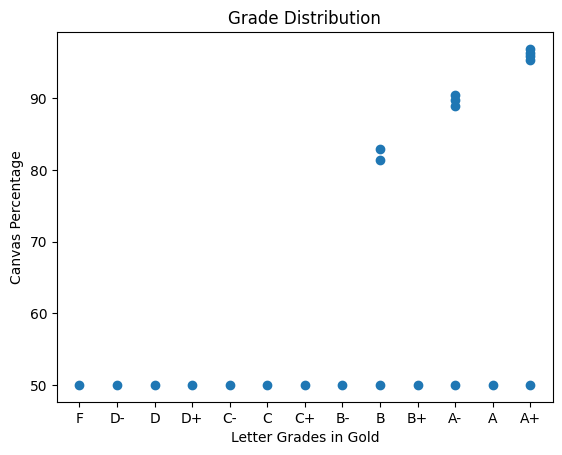

In [35]:
plt.scatter(reversed_matrix[0, :], scaled_y_values.flatten())
plt.xlabel('Letter Grades in Gold')
plt.ylabel('Canvas Percentage')
plt.title('Grade Distribution')
plt.show()